In [2]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Data Preprocessing

### •	Load the dataset: Start by loading the Titanic dataset into your environment.

In [ ]:
# Correct path as per your system
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### •	Handling missing values: Identify missing values in columns like Age, Cabin, and Embarked. 

In [ ]:
print(data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
data.drop(['Name','Ticket'], axis=1, inplace=True)

In [ ]:
print(data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


### Missing values have been fixed

### •	Encoding categorical variables: Convert categorical variables like Sex and Embarked into numerical form through one-hot encoding or label encoding.

In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
data.head() # the sex and embarqed columns have been converted into numerical data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True
4,5,0,3,0.433312,0,0,-0.486337,True,False,True


### •	Normalizing or standardizing numerical variables: Apply normalization or standardization to numerical variables such as Age and Fare to ensure they're on the same scale, especially important for models like KNN and SVM.

In [ ]:
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [ ]:
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True
4,5,0,3,0.433312,0,0,-0.486337,True,False,True


### •	Splitting the dataset: Divide the dataset into training and testing sets, typically using a 70-30 or 80-20 train-test split ratio.

In [ ]:
X = data.drop(columns=['Survived'])  # Features
y = data['Survived']  # Target variable

In [ ]:
#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Model Implementation and  3. Model Evaluation(All using a For Loop)

### •	Train each model on the training dataset.
### •	Predict outcomes on the testing dataset using each trained model.
### •	Compute the accuracy of each model, along with precision, recall, and F1-score.
### •	Confusion matrices: Optionally

## • Logistic Regression

In [ ]:
llog_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)

print('Logistic Regression - Accuracy:', accuracy)
print('Logistic Regression - Precision:', precision)
print('Logistic Regression - Recall:', recall)
print('Logistic Regression - F1-score:', f1)

Logistic Regression - Accuracy: 0.7932960893854749
Logistic Regression - Precision: 0.7846153846153846
Logistic Regression - Recall: 0.6891891891891891
Logistic Regression - F1-score: 0.7338129496402878


## •	K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

print('KNN - Accuracy:', accuracy)
print('KNN - Precision:', precision)
print('KNN - Recall:', recall)
print('KNN - F1-score:', f1)

KNN - Accuracy: 0.5642458100558659
KNN - Precision: 0.4583333333333333
KNN - Recall: 0.2972972972972973
KNN - F1-score: 0.36065573770491804


## •	Support Vector Machine (SVM)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, svc_pred)
precision = precision_score(y_test, svc_pred)
recall = recall_score(y_test, svc_pred)
f1 = f1_score(y_test, svc_pred)

print('SVM - Accuracy:', accuracy)
print('SVM - Precision:', precision)
print('SVM - Recall:', recall)
print('SVM - F1-score:', f1)

SVM - Accuracy: 0.5865921787709497
SVM - Precision: 0.0
SVM - Recall: 0.0
SVM - F1-score: 0.0


## •	Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, decision_tree_pred)
precision = precision_score(y_test, decision_tree_pred)
recall = recall_score(y_test, decision_tree_pred)
f1 = f1_score(y_test, decision_tree_pred)

print('Decision Tree - Accuracy:', accuracy)
print('Decision Tree - Precision:', precision)
print('Decision Tree - Recall:', recall)
print('Decision Tree - F1-score:', f1)

Decision Tree - Accuracy: 0.7039106145251397
Decision Tree - Precision: 0.6363636363636364
Decision Tree - Recall: 0.6621621621621622
Decision Tree - F1-score: 0.6490066225165563


## •	Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, random_forest_pred)
precision = precision_score(y_test, random_forest_pred)
recall = recall_score(y_test, random_forest_pred)
f1 = f1_score(y_test, random_forest_pred)

print('Random Forest - Accuracy:', accuracy)
print('Random Forest - Precision:', precision)
print('Random Forest - Recall:', recall)
print('Random Forest - F1-score:', f1)

Random Forest - Accuracy: 0.8212290502793296
Random Forest - Precision: 0.7916666666666666
Random Forest - Recall: 0.7702702702702703
Random Forest - F1-score: 0.7808219178082192


## •	Gradient Boosting Machines (GBM)

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, gbm_pred)
precision = precision_score(y_test, gbm_pred)
recall = recall_score(y_test, gbm_pred)
f1 = f1_score(y_test, gbm_pred)

print('GBM - Accuracy:', accuracy)
print('GBM - Precision:', precision)
print('GBM - Recall:', recall)
print('GBM - F1-score:', f1)

GBM - Accuracy: 0.8212290502793296
GBM - Precision: 0.8181818181818182
GBM - Recall: 0.7297297297297297
GBM - F1-score: 0.7714285714285715


## •	AdaBoost


In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, adaboost_pred)
precision = precision_score(y_test, adaboost_pred)
recall = recall_score(y_test, adaboost_pred)
f1 = f1_score(y_test, adaboost_pred)

print('AdaBoost - Accuracy:', accuracy)
print('AdaBoost - Precision:', precision)
print('AdaBoost - Recall:', recall)
print('AdaBoost - F1-score:', f1)

AdaBoost - Accuracy: 0.7877094972067039
AdaBoost - Precision: 0.7647058823529411
AdaBoost - Recall: 0.7027027027027027
AdaBoost - F1-score: 0.7323943661971832


## •	Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, naive_bayes_pred)
precision = precision_score(y_test, naive_bayes_pred)
recall = recall_score(y_test, naive_bayes_pred)
f1 = f1_score(y_test, naive_bayes_pred)

print('Naive Bayes - Accuracy:', accuracy)
print('Naive Bayes - Precision:', precision)
print('Naive Bayes - Recall:', recall)
print('Naive Bayes - F1-score:', f1)

Naive Bayes - Accuracy: 0.770949720670391
Naive Bayes - Precision: 0.72
Naive Bayes - Recall: 0.7297297297297297
Naive Bayes - F1-score: 0.7248322147651007


# 4. Comparison and Analysis


### •	Compare the performance of the models based on the computed metrics.

In [ ]:
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GBM', 'AdaBoost', 'Naive Bayes']
accuracies = []
precisions = []
recalls = []
f1_scores = []


for model, pred in zip([log_reg, knn, svc, decision_tree, random_forest, gbm, adaboost, naive_bayes],
                       [log_reg_pred, knn_pred, svc_pred, decision_tree_pred, random_forest_pred, gbm_pred, adaboost_pred, naive_bayes_pred]):
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

summary_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies, 'Precision': precisions,
                           'Recall': recalls, 'F1-score': f1_scores})
summary_df = summary_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.821229   0.791667  0.770270  0.780822
1                  GBM  0.821229   0.818182  0.729730  0.771429
2  Logistic Regression  0.793296   0.784615  0.689189  0.733813
3             AdaBoost  0.787709   0.764706  0.702703  0.732394
4          Naive Bayes  0.770950   0.720000  0.729730  0.724832
5        Decision Tree  0.703911   0.636364  0.662162  0.649007
6                  SVM  0.586592   0.000000  0.000000  0.000000
7                  KNN  0.564246   0.458333  0.297297  0.360656


## •	Visualizations: Create bar plots or line graphs illustrating the comparative performance.

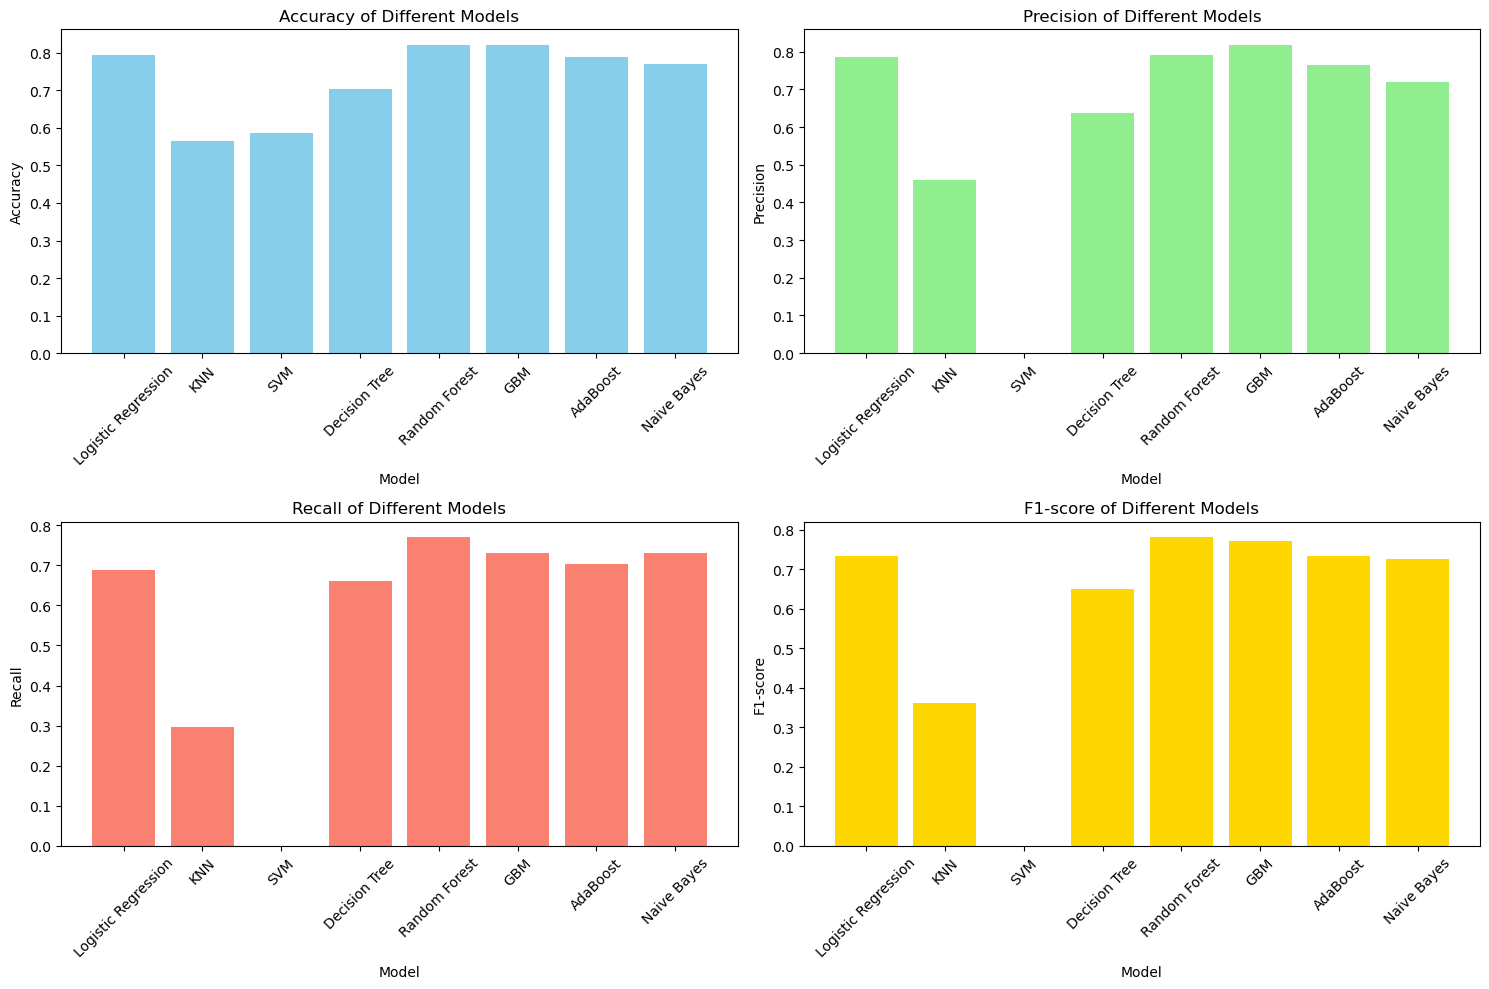

In [ ]:
# Create subplots for each metric
plt.figure(figsize=(15, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Precision
plt.subplot(2, 2, 2)
plt.bar(model_names, precisions, color='lightgreen')
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)

# Recall
plt.subplot(2, 2, 3)
plt.bar(model_names, recalls, color='salmon')
plt.title('Recall of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)

# F1-score
plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color='gold')
plt.title('F1-score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## We found that the Random Forest and GBM are best for this type of analysis